In [1]:
!make

g++ -O3 -c -fpic conv.cpp -o conv.o
g++ -O3 -shared -fpic conv.o -o libconv.so


In [2]:
import numpy as np
from scipy import signal, misc
inImage = misc.ascent()
inImage = inImage.astype(np.float64)
kernel = np.array([[0, 0.0, 0],
                   [-1.0, 0, -1.0],
                   [0, 0.0, 0]])
outImage = signal.convolve2d(inImage, kernel, mode='same')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

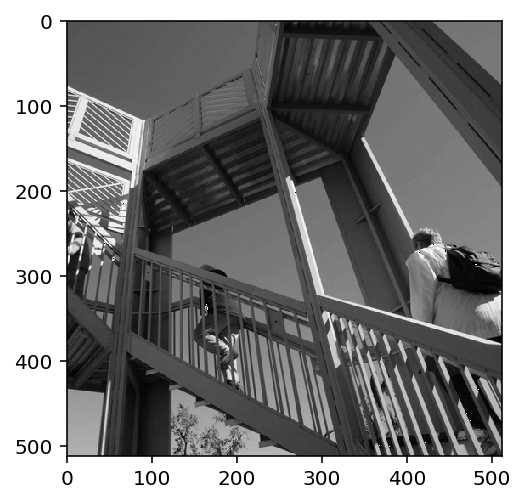

In [4]:
plt.imshow(inImage, cmap='gray')
plt.show()

In [5]:
outImage

array([[ -83., -166., -166., ..., -234., -234., -117.],
       [ -82., -165., -165., ..., -234., -234., -117.],
       [ -81., -163., -164., ..., -234., -234., -117.],
       ..., 
       [-178., -356., -356., ..., -117., -114.,  -59.],
       [-178., -356., -356., ..., -106., -113.,  -57.],
       [-178., -356., -356., ...,  -93., -115.,  -57.]])

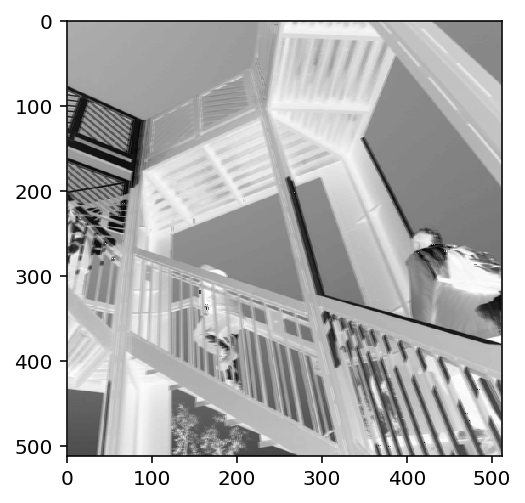

In [6]:
plt.imshow(outImage, cmap='gray')
plt.show()

In [7]:
from ctypes import CDLL, c_double, c_void_p, c_int, c_bool
import numpy as np

## Vector Addtion

In [8]:
a = np.ones(10, dtype=np.float64)
b = 100 * np.ones(10, dtype=np.float64)
c = np.zeros(10, dtype=np.float64)

In [9]:
path = './libconv.so'
lib = CDLL(path)
vecAdd = lib['add'] # need the extern!!
vecAdd.argtypes = (c_void_p, c_void_p, c_void_p, c_int,)
vecAdd.restype = None
vecAdd(c_void_p(a.ctypes.data), c_void_p(b.ctypes.data),
    c_void_p(c.ctypes.data), c_int(10))

print(a+b)
print(c)

[ 101.  101.  101.  101.  101.  101.  101.  101.  101.  101.]
[ 101.  101.  101.  101.  101.  101.  101.  101.  101.  101.]


## Convolution 2D

In [10]:
inImage = misc.ascent()
inImage = inImage.astype(np.float64)
nRows, nCols = inImage.shape
kernel = np.array([[0, 0.0, 0],
                   [-1.0, 0, -1.0],
                   [0, 0.0, 0]], dtype=np.float64)
kRows, kCols = kernel.shape
outImage_fromC = inImage * 0

In [11]:
path = './libconv.so'
lib = CDLL(path)
vecAdd = lib['conv_2d'] # need the extern!!
vecAdd.argtypes = (c_int, c_int, c_void_p, c_int, c_int, c_void_p, c_void_p,)
vecAdd.restype = None
vecAdd(c_int(kRows), c_int(kCols), c_void_p(kernel.ctypes.data), \
       c_int(nRows), c_int(nCols), c_void_p(inImage.ctypes.data), c_void_p(outImage_fromC.ctypes.data))

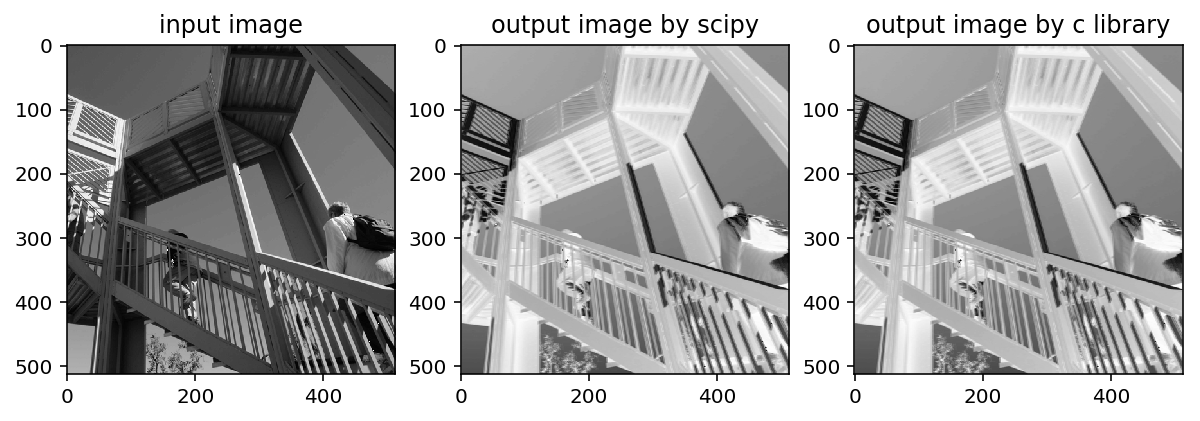

In [12]:
plt.figure(figsize=(10,30))
plt.subplot(1,3,1)
plt.imshow(inImage, cmap='gray')
plt.title('input image')
plt.subplot(1,3,2)
plt.imshow(outImage, cmap='gray')
plt.title('output image by scipy')
plt.subplot(1,3,3)
plt.imshow(outImage_fromC, cmap='gray')
plt.title('output image by c library')
plt.show()

In [13]:
np.linalg.norm(outImage_fromC - outImage)

0.0